In [1]:
# loading libraries

library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

set.seed(19)

options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

First, we will read in the tennis data.

In [2]:
## reading data (from https://www.ultimatetennisstatistics.com/)

tennis_data <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")
tennis_data

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
496,26 (03-09-1993),Austria,Right-handed,Wikipedia,5 (5890),4 (06-11-2017),Dominic Thiem,One-handed,"$22,132,368 15th all-time leader in earnings",⋯,1.Dominic.Thiem,@ThiemDomi,Dominator,NA,NA,dominicthiem.tennis,NA,NA,NA,NA
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


We can see that there are several issues with the data; there are far more variables than we wish to work with, several columns contain more than one variable, and many columns are of data type `chr`.

Next, we organize and tidy the data into a workable form.

We select relevant columns, format cells so that each cell contains one value, and convert all `chr` type columns to either `dbl` or `fct`.

In [3]:
## organizing/tidying data

colnames(tennis_data) = make.names(colnames(tennis_data))

tennis <- tennis_data |>
            # select(Age, Plays, Best.Rank, Backhand, Height, Favorite.Surface) |>  # Weight and Coach seem relevant, however there are too many missing values
            select(Best.Rank, Age, Height, Weight, Plays, Backhand, Favorite.Surface) |> # select relevant variables
            mutate(across(everything(), function(col) {gsub(" .*", "", col)})) |> # format cells
            mutate(across(Best.Rank:Weight, as.numeric)) |> # convert chr to dbl
            mutate(across(Plays:Favorite.Surface, as.factor)) # convert chr to fct
            # drop_na()
      
tennis

Best.Rank,Age,Height,Weight,Plays,Backhand,Favorite.Surface
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
363,26,NA,NA,Right-handed,NA,NA
316,18,NA,NA,Left-handed,Two-handed,NA
44,32,185,NA,Right-handed,Two-handed,Fast
130,21,NA,NA,Right-handed,Two-handed,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,26,185,82,Right-handed,One-handed,Clay
342,23,NA,NA,Left-handed,NA,NA
419,24,NA,NA,NA,NA,NA
408,22,NA,NA,Left-handed,Two-handed,NA


The tennis data is now tidy.

Before we begin preliminary exploration, we separate our data into training data and testing data for assessment purposes later.

In [4]:
tennis_split <- initial_split(tennis, prop = 0.75, strata = Best.Rank)

tennis_training <- training(tennis_split)
tennis_testing <- testing(tennis_split)

We then explore the training data by calculating the percentage of missing values in each column, as well as the means of numeric columns and the modes of factor columns.

In [5]:
# calculating missing percentages

missing_num <- tennis_training |>
                select(where(is.numeric)) |>
                pivot_longer(everything(), names_to = "var", values_to = "val") |>
                mutate(missing = is.na(val)) |>
                group_by(var, missing) |>
                summarise(n = n()) |>
                mutate(percentage_missing = (n / nrow(tennis)) * 100)

missing_fct <- tennis_training |>
                select(where(is.factor)) |>
                pivot_longer(everything(), names_to = "var", values_to = "val") |>
                mutate(missing = is.na(val)) |>
                group_by(var, missing) |>
                summarise(n = n()) |>
                mutate(percentage_missing = n / nrow(tennis) * 100)

missing_all <- bind_rows(missing_num, missing_fct) |>
                filter(missing) |>
                select(var, percentage_missing)

# summarizing

summary_num <- tennis_training |>
                select(where(is.numeric)) |>
                summarize_all(mean, na.rm = TRUE)

find_mode <- function(v) # calculates mode of given vector
{
    tibble(var = v, y = 0) |>
        na.omit() |>
        group_by(var) |>
        summarize(n = n()) |>
        slice_max(n) |>
        select(var) |>
        pull()
}

summary_fct <- tennis_training |>
                select(where(is.factor)) |>
                summarize_all(find_mode)

summary_all <- bind_cols(summary_num, summary_fct)

missing_all
summary_all

`summarise()` has grouped output by 'var'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'var'. You can override using the `.groups`
argument.


var,percentage_missing
<chr>,<dbl>
Height,57.6
Weight,71.8
Backhand,14.4
Favorite.Surface,38.0
Plays,7.2


Best.Rank,Age,Height,Weight,Plays,Backhand,Favorite.Surface
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
178.5228,25.85255,185.6471,84.21429,Right-handed,Two-handed,Clay


Above are the percentage of missing values, as well as means/modes. As we can see, height, weight, and favorite surface are lacking in many of our observations. This will result in less data for us to work with, if we choose to include them in our analyses.

For our preliminary data analysis, we plot several variables of interest against best rank.

First, we define some variables and functions to ease the process.

In [6]:
# defining variables/functions

point_alpha <- 0.6
point_size <- 2.5

theme_layer <- theme(text = element_text(size = 20))

set_size <- function(p)
{
    switch(
        p,
        "age" = options(repr.plot.width = 8, repr.plot.height = 7),
        "height" = options(repr.plot.width = 7, repr.plot.height = 6),
        "weight" = options(repr.plot.width = 6, repr.plot.height = 5),
    )
}

Plotting,

Warning message:
“Removed 288 rows containing missing values (geom_point).”


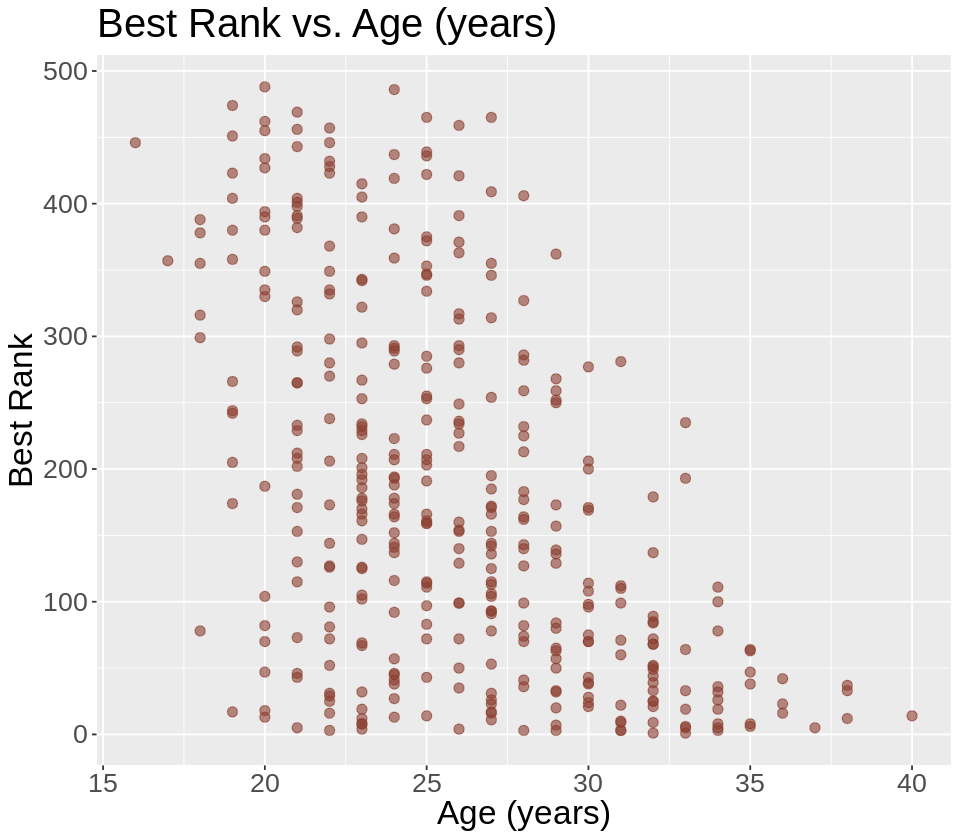

Warning message:
“Removed 359 rows containing missing values (geom_point).”


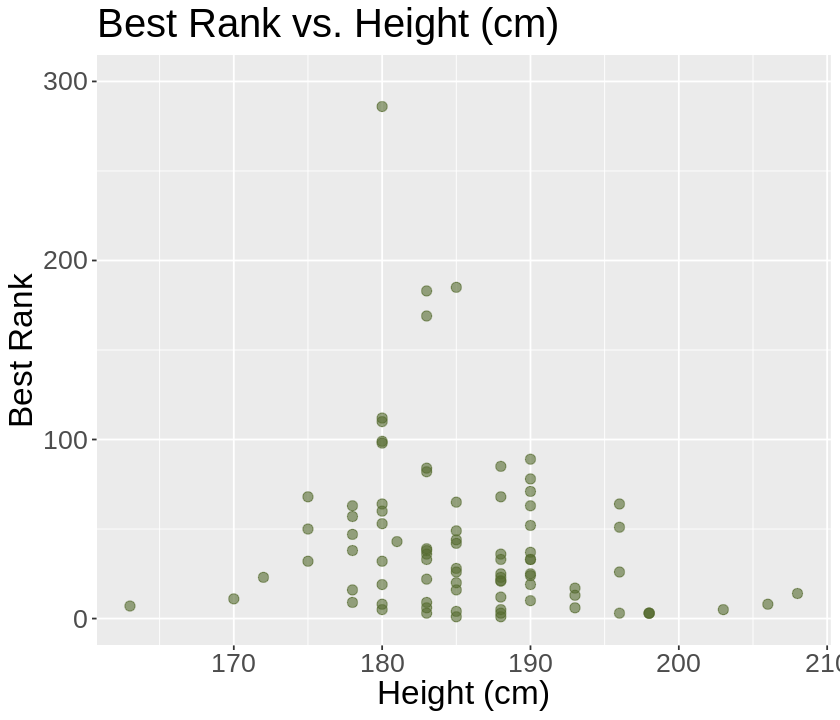

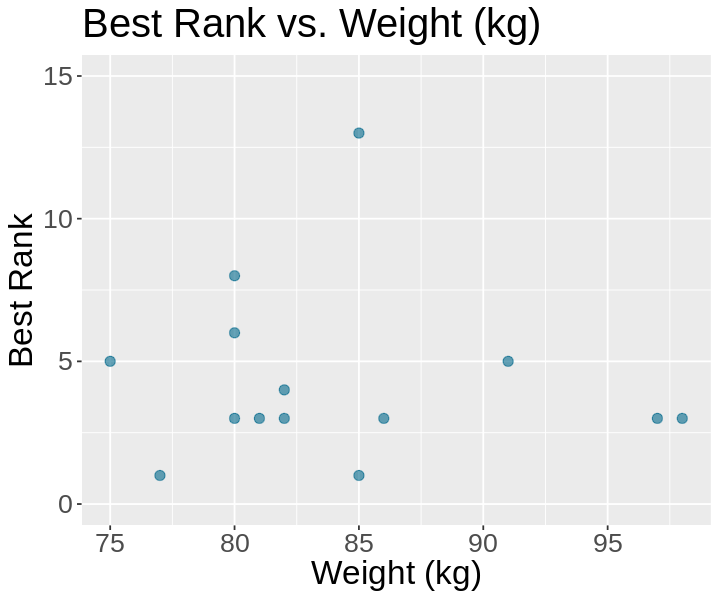

In [7]:
## visualizing data

age_plot <- tennis_training |>
                ggplot(aes(x = Age, y = Best.Rank)) +
                geom_point(alpha = point_alpha, colour = "coral4", size = point_size) +
                labs(x = "Age (years)", y = "Best Rank") +
                ggtitle("Best Rank vs. Age (years)") +
                theme_layer

height_plot <- tennis_training |>
                ggplot(aes(x = Height, y = Best.Rank)) +
                geom_point(alpha = point_alpha, colour = "darkolivegreen", size = point_size) +
                ylim(0, 300) +
                labs(x = "Height (cm)", y = "Best Rank") +
                ggtitle("Best Rank vs. Height (cm)") +
                theme_layer

weight_plot <- tennis_training |>
                ggplot(aes(x = Weight, y = Best.Rank)) +
                geom_point(alpha = point_alpha, colour = "deepskyblue4", size = point_size) +
                ylim(0, 15) +
                labs(x = "Weight (kg)", y = "Best Rank") +
                ggtitle("Best Rank vs. Weight (kg)") +
                theme_layer

set_size("age")
age_plot
set_size("height")
height_plot
set_size("weight")
weight_plot

Here, we can observe best rank plotted against age, height, and weight.

The best rank vs age plot seems to show a weak negative relationship. <br>
The best rank vs height plot loosely takes on the shape of a normal distribution. <br>
The best rank vs weight plot, with very few data points, also displays the shape of a normal distribution, albeit far weaker.

Next, we colour these plots by factors of interest (i.e., handedness, backhand, and favourite surface).

Warning message:
“Removed 288 rows containing missing values (geom_point).”


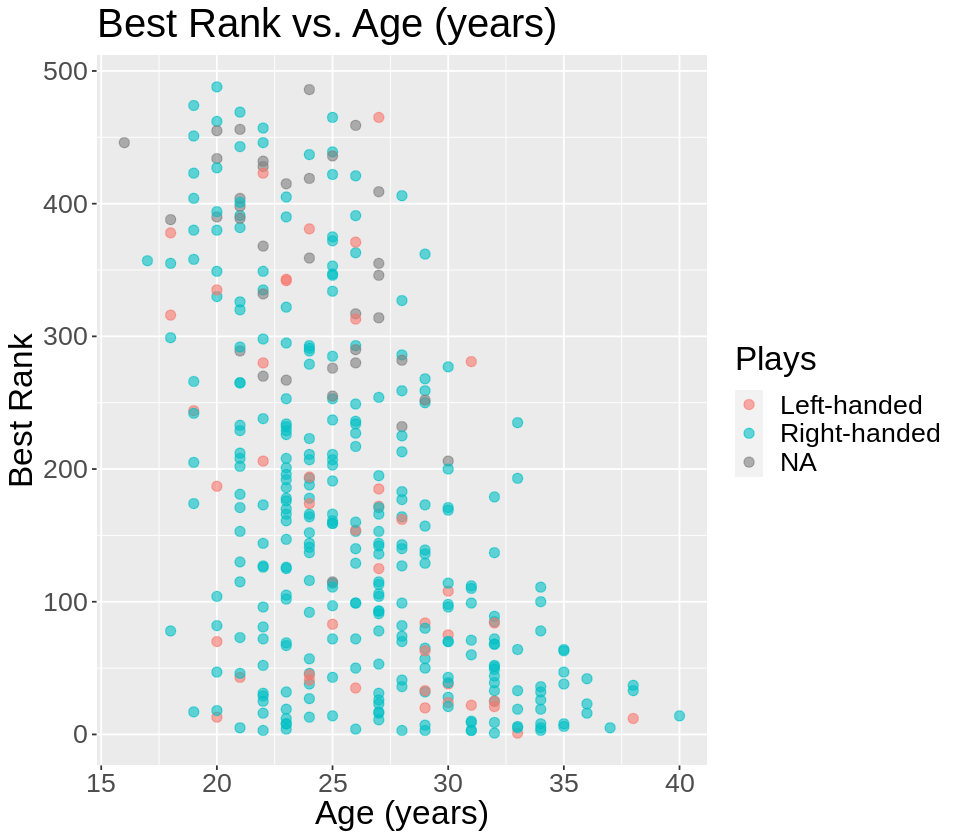

Warning message:
“Removed 359 rows containing missing values (geom_point).”


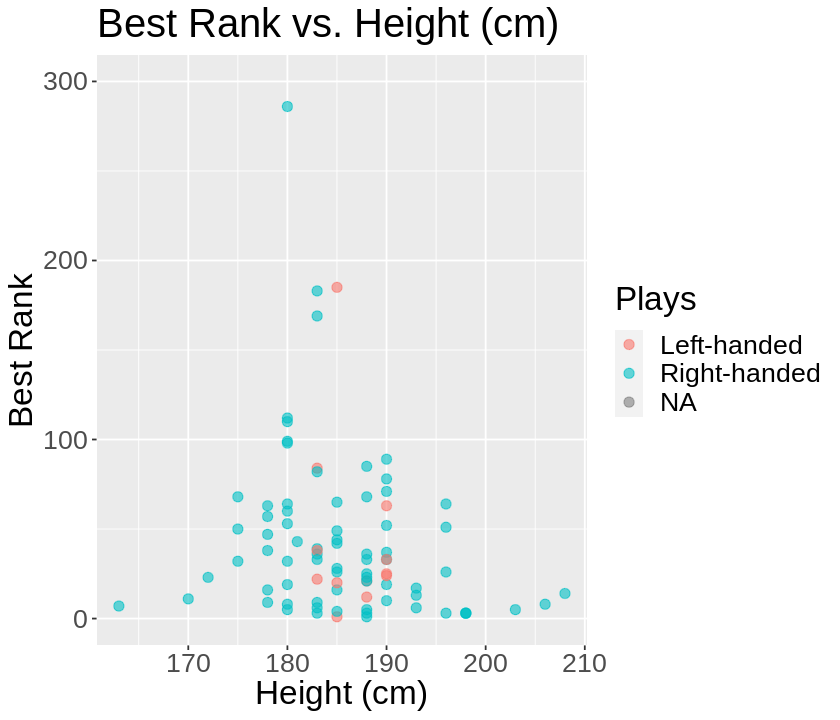

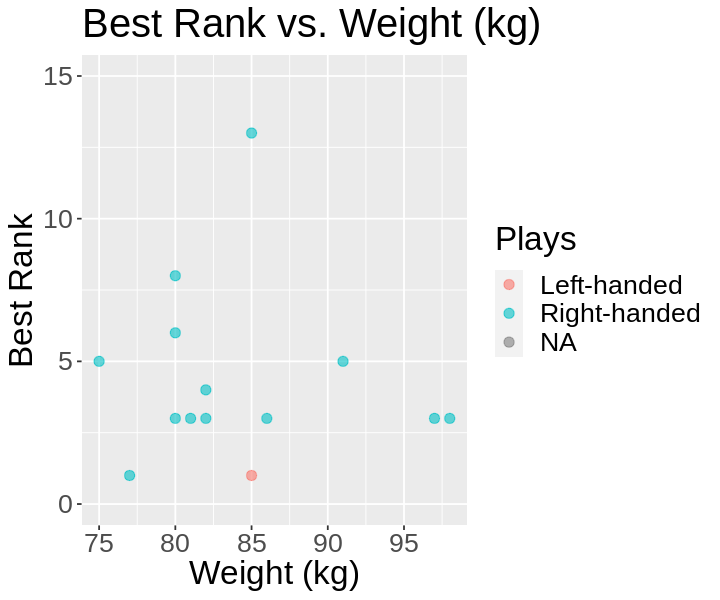

In [8]:
# with colouring by handedness

age_plot_c_p <- tennis_training |>
                ggplot(aes(x = Age, y = Best.Rank, colour = Plays)) +
                geom_point(alpha = point_alpha, size = point_size) +
                labs(x = "Age (years)", y = "Best Rank") +
                ggtitle("Best Rank vs. Age (years)") +
                theme_layer

height_plot_c_p <- tennis_training |>
                ggplot(aes(x = Height, y = Best.Rank, colour = Plays)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 300) +
                labs(x = "Height (cm)", y = "Best Rank") +
                ggtitle("Best Rank vs. Height (cm)") +
                theme_layer

weight_plot_c_p <- tennis_training |>
                ggplot(aes(x = Weight, y = Best.Rank, colour = Plays)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 15) +
                labs(x = "Weight (kg)", y = "Best Rank") +
                ggtitle("Best Rank vs. Weight (kg)") +
                theme_layer

set_size("age")
age_plot_c_p
set_size("height")
height_plot_c_p
set_size("weight")
weight_plot_c_p

Warning message:
“Removed 288 rows containing missing values (geom_point).”


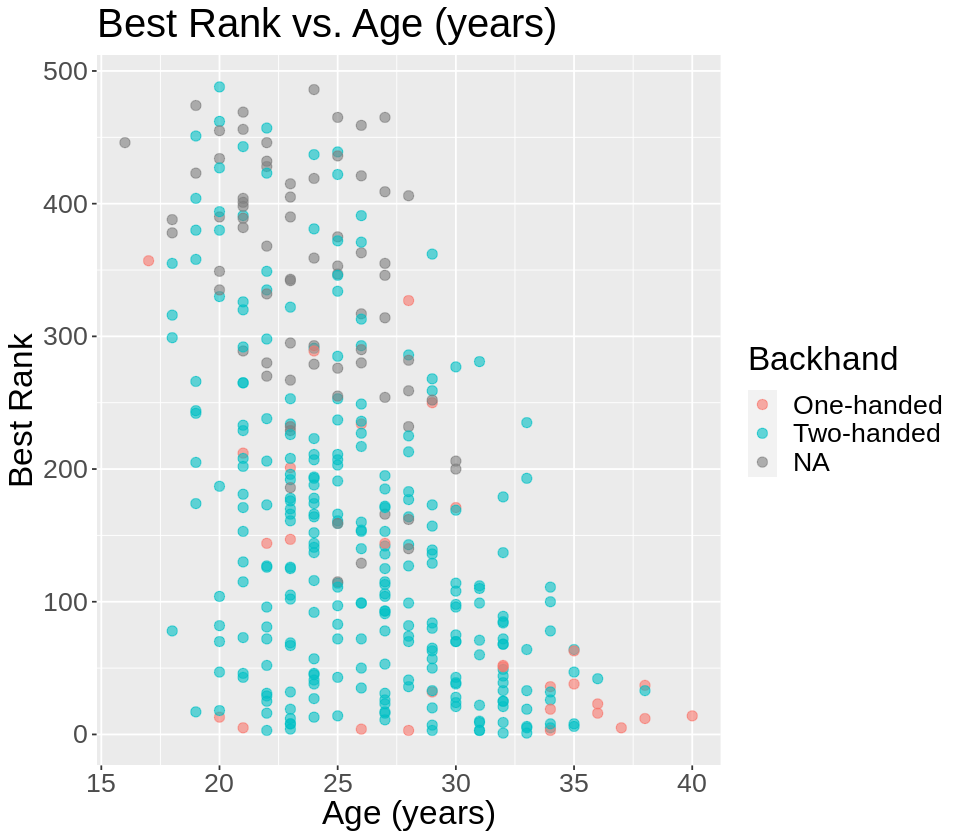

Warning message:
“Removed 359 rows containing missing values (geom_point).”


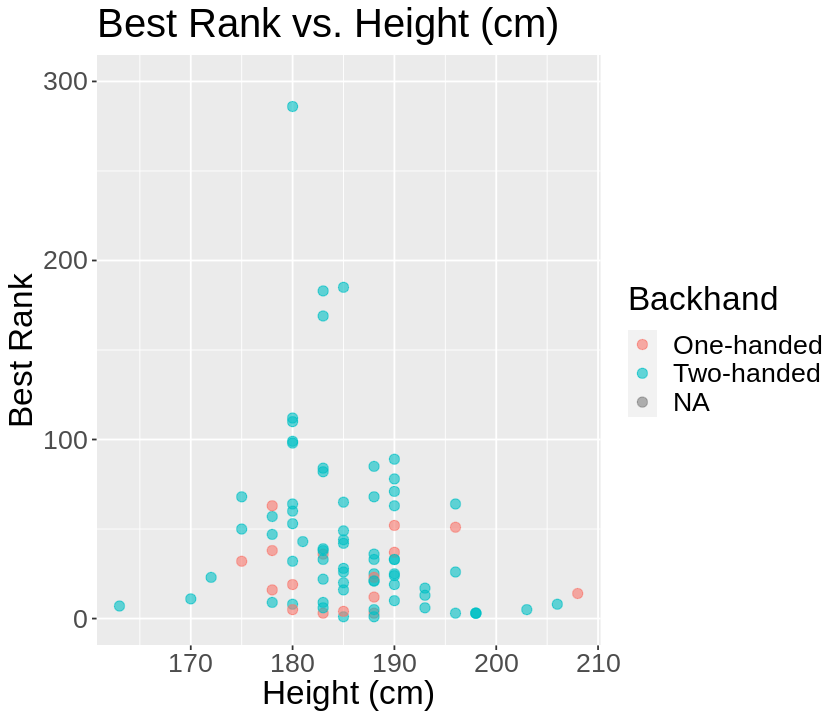

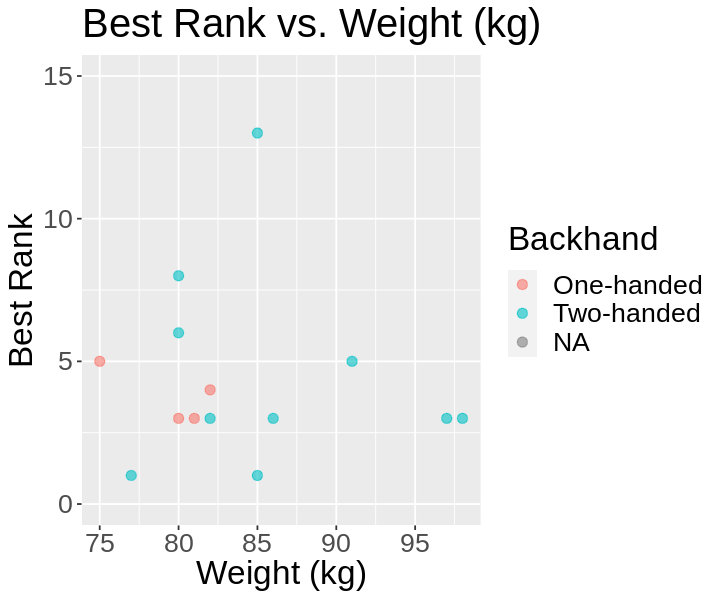

In [9]:
# with colouring by backhand

age_plot_c_bh <- tennis_training |>
                ggplot(aes(x = Age, y = Best.Rank, colour = Backhand)) +
                geom_point(alpha = point_alpha, size = point_size) +
                labs(x = "Age (years)", y = "Best Rank") +
                ggtitle("Best Rank vs. Age (years)") +
                theme_layer

height_plot_c_bh <- tennis_training |>
                ggplot(aes(x = Height, y = Best.Rank, colour = Backhand)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 300) +
                labs(x = "Height (cm)", y = "Best Rank") +
                ggtitle("Best Rank vs. Height (cm)") +
                theme_layer

weight_plot_c_bh <- tennis_training |>
                ggplot(aes(x = Weight, y = Best.Rank, colour = Backhand)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 15) +
                labs(x = "Weight (kg)", y = "Best Rank") +
                ggtitle("Best Rank vs. Weight (kg)") +
                theme_layer

set_size("age")
age_plot_c_bh
set_size("height")
height_plot_c_bh
set_size("weight")
weight_plot_c_bh

Warning message:
“Removed 288 rows containing missing values (geom_point).”


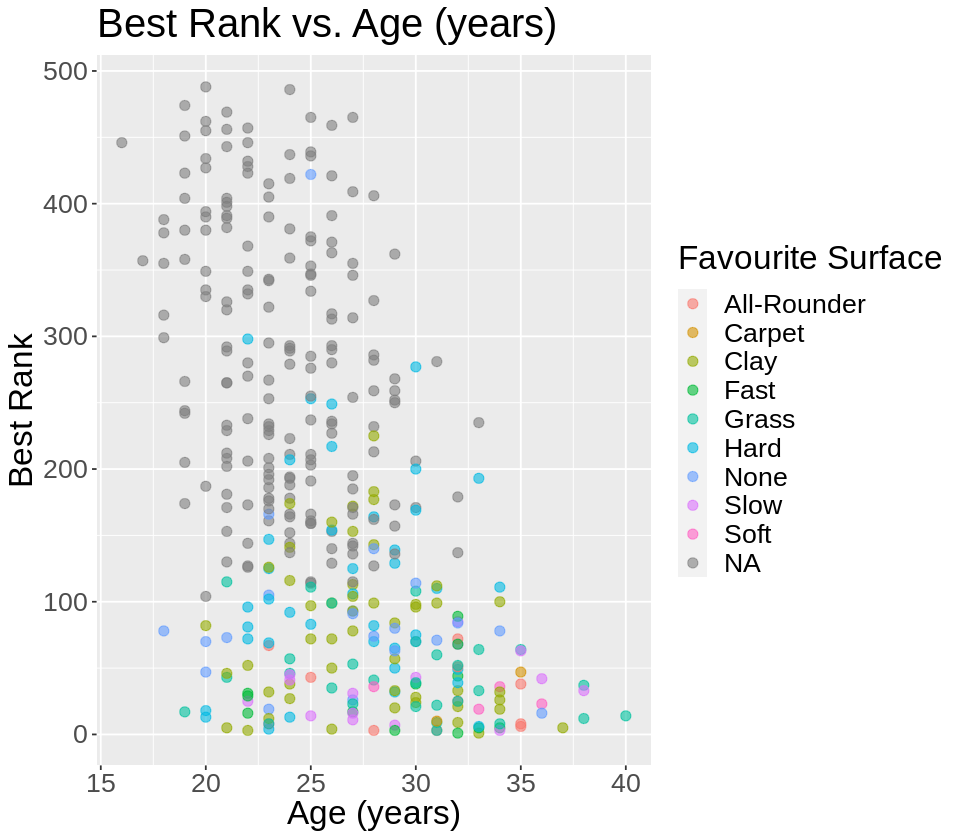

Warning message:
“Removed 359 rows containing missing values (geom_point).”


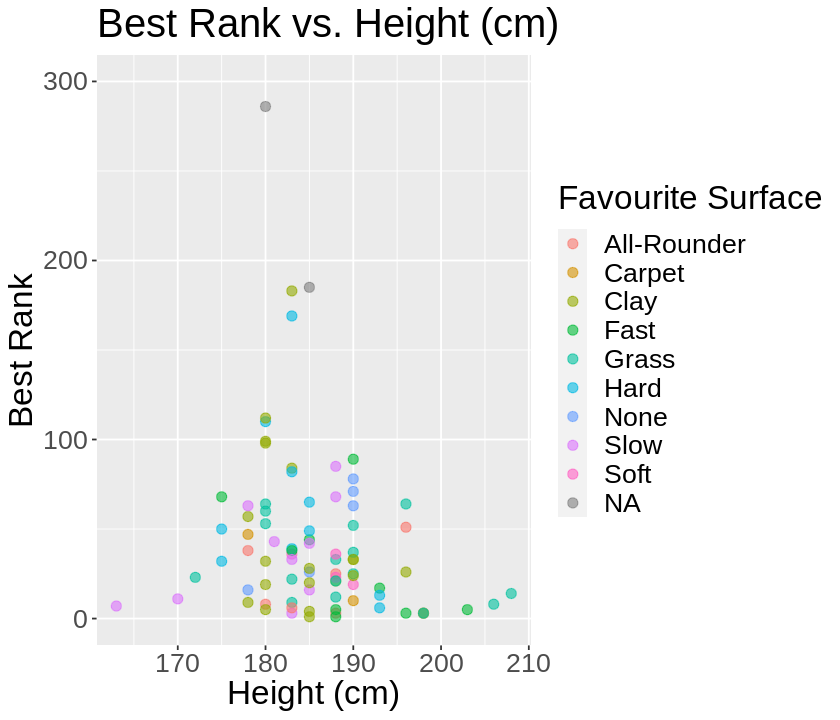

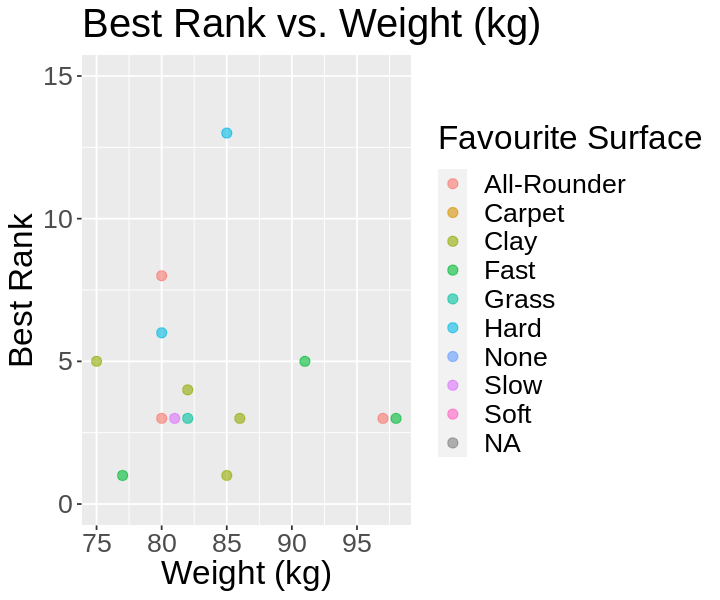

In [14]:
# with colouring by favourite surface

age_plot_c_fs <- tennis_training |>
                ggplot(aes(x = Age, y = Best.Rank, colour = Favorite.Surface)) +
                geom_point(alpha = point_alpha, size = point_size) +
                labs(x = "Age (years)", y = "Best Rank", colour = "Favourite Surface") +
                ggtitle("Best Rank vs. Age (years)") +
                theme_layer

height_plot_c_fs <- tennis_training |>
                ggplot(aes(x = Height, y = Best.Rank, colour = Favorite.Surface)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 300) +
                labs(x = "Height (cm)", y = "Best Rank", colour = "Favourite Surface") +
                ggtitle("Best Rank vs. Height (cm)") +
                theme_layer

weight_plot_c_fs <- tennis_training |>
                ggplot(aes(x = Weight, y = Best.Rank, colour = Favorite.Surface)) +
                geom_point(alpha = point_alpha, size = point_size) +
                ylim(0, 15) +
                labs(x = "Weight (kg)", y = "Best Rank", colour = "Favourite Surface") +
                ggtitle("Best Rank vs. Weight (kg)") +
                theme_layer

set_size("age")
age_plot_c_fs
set_size("height")
height_plot_c_fs
set_size("weight")
weight_plot_c_fs

Analyzing the coloured plots, there does not seem to be an immediate correlation between best rank and handedness, backhand, or favourite surface.